## Text Mining

![miners](img/text-miners.jpeg)

## Part 1

### Situation:

![greg](img/thinking.jpeg)

Last week we helped Greg build a model to sort through articles, but we rushed through the pre-processing of it all. This lesson we will go through it step by step.

### Discussion

- What type of problem is this?
- What are we trying to do?
- What steps do you think might be involved? (big picture steps)

![talk](https://media.giphy.com/media/l2SpQRuCQzY1RXHqM/giphy.gif)

### **Goal**: to internalize the steps, challenges, and methodology of text mining
- explore text analysis by hand
- apply text mining steps in Jupyter with Python libraries NLTK
- classify documents correctly

#### How is text mining different? What is text?

- Order the words from **SMALLEST** to **LARGEST** units
 - character
 - corpora
 - sentence
 - word
 - corpus
 - paragraph
 - document

(after it is all organized)

- Any disagreements about the terms used?

### Steps with articles:

https://github.com/aapeebles/text_examples 

1. Create list of words
2. tally how many times words are used
3. order the words by frequency
4. try to find similar articles in the group using only your frequencies 


Yes, the list might might be long.
![list](https://media.giphy.com/media/YLHwkqayc1j7a/giphy.gif)

DISCUSS!

### Bag of Words Steps

<img style="float: left" src="./img/bag_of_word.jpg" width="200">

![step by step](https://i.gifer.com/VxbJ.gif)

1. make all lower case
2. Remove punctuation, numbers, symbols, etc
3. Remove stop words, perhaps develop custom stop words list
4. Stemming/Lemmatization


But what about tokenization? when's the best time to tokenize?

In [42]:
text = "Reboot ordered for EU patent law A European Parliament committee has ordered a rewrite of the proposals for controversial new European Union rules which govern computer-based inventions. The Legal Affairs Committee (JURI) said the Commission should re-submit the Computer Implemented Inventions Directive after MEPs failed to back it. It has had vocal critics who say it could favour large over small firms and impact open-source software innovation. Supporters say it would let firms protect their inventions. The directive is intended to offer patent protection to inventions that use software to achieve their effect, in other words, \"computer implemented invention\". The draft law suffered setbacks when Poland, one of the largest EU member states, rejected its adoption twice in two months. Intense lobbying on the issue has started to gain momentum in some national parliaments putting them under immense pressure. Only two MEPs backed the draft law at the JURI meeting, with one voting to abstain. Opponents of the draft directive welcomed the decision and said a new first reading of the proposals would give the EU a chance to have fuller debates about its implications in all member states. In the US, the patenting of computer programs and internet business methods is permitted. This means that the US-based Amazon.com holds a patent for its \"one-click shopping\" service, for example. Critics are concerned that the directive could lead to a similar model happening in Europe. This, they fear, could hurt small software developers because they do not have the legal and financial might of larger companies if they had to fight patent legal action in court. Supporters say current laws are inefficient and it would serve to even up a playing field without bringing EU laws in line with the US."
# split into word list and make each word lowercase
text = [i.lower() for i in text.split()]
# remove puntuation, etc.
special = ["."]

for word in text:
    for char in word:
        if char not in special:
            word.replace(char, '')

stopwords = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

no_stops = []
for i in text:
    if i not in stopwords:
        no_stops.append(i)

word_dict = {}

unique_words = list(set(no_stops))
word_dict = {word:0 for word in unique_words}

for word in no_stops:    
    word_dict[word] += 1
    
word_dict

{'firms': 2,
 'affairs': 1,
 'meeting,': 1,
 'say': 3,
 'proposals': 2,
 'intended': 1,
 'intense': 1,
 'adoption': 1,
 'parliaments': 1,
 'juri': 1,
 'critics': 2,
 'companies': 1,
 'draft': 3,
 'protection': 1,
 'controversial': 1,
 'eu': 4,
 'holds': 1,
 'rules': 1,
 'playing': 1,
 '"computer': 1,
 'states,': 1,
 'impact': 1,
 'directive': 4,
 'it.': 1,
 'similar': 1,
 'words,': 1,
 'field': 1,
 'line': 1,
 'large': 1,
 'current': 1,
 'fuller': 1,
 'laws': 2,
 'use': 1,
 'happening': 1,
 'this,': 1,
 'european': 2,
 'decision': 1,
 'twice': 1,
 'shopping"': 1,
 'permitted.': 1,
 'voting': 1,
 'implications': 1,
 'inefficient': 1,
 'abstain.': 1,
 'software': 3,
 'small': 2,
 'rejected': 1,
 'reading': 1,
 'parliament': 1,
 'europe.': 1,
 'supporters': 2,
 'member': 2,
 'rewrite': 1,
 'offer': 1,
 'ordered': 2,
 'developers': 1,
 'concerned': 1,
 'inventions.': 2,
 'pressure.': 1,
 'committee': 2,
 'failed': 1,
 'gain': 1,
 'implemented': 2,
 'computer-based': 1,
 'inventions': 2,
 '

## New library!

while we have seen language processing tools in spark, NLTK is its own python library. And of course, it has its own [documentation](https://www.nltk.org/)

In [44]:
from __future__ import print_function
import nltk
import sklearn


In [45]:
nltk.download() #for when you are bringing in files from gutenburg, etf

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [46]:
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
import urllib

In [47]:
metamorph = urllib.request.urlopen('http://www.gutenberg.org/cache/epub/5200/pg5200.txt').read()
#print(x.read())


In [48]:
metamorph_st = metamorph.decode("utf-8") 

Load your article here

In [50]:
# print(tokens[:100])

In [51]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
metamorph_tokens_raw = nltk.regexp_tokenize(metamorph_st, pattern)
print(metamorph_tokens_raw[:100])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', 'Details', 'Below', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'Title', 'Metamorphosis', 'Author', 'Franz', 'Kafka', 'Translator', 'David', 'Wyllie', 'Release', 'Date', 'August', 'EBook', 'First', 'posted', 'May', 'Last', 'updated', 'May', 'Language', 'English', 'START', 'OF', 'THIS']


In [52]:
metamorph_tokens = [i.lower() for i in metamorph_tokens_raw]
print(metamorph_tokens[:100])


['the', 'project', 'gutenberg', 'ebook', 'of', 'metamorphosis', 'by', 'franz', 'kafka', 'translated', 'by', 'david', 'wyllie', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'this', 'is', 'a', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'below', 'please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'august', 'ebook', 'first', 'posted', 'may', 'last', 'updated', 'may', 'language', 'english', 'start', 'of', 'this']


In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
stop_words = set(stopwords.words('english'))
metamorph_tokens_stopped = [w for w in metamorph_tokens if not w in stop_words]
print(metamorph_tokens_stopped[:100])

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'net', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'please', 'follow', 'copyright', 'guidelines', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'august', 'ebook', 'first', 'posted', 'may', 'last', 'updated', 'may', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'copyright', 'c', 'david', 'wyllie', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armour', 'like', 'back', 'lifted', 'head', 'little', 'could', 'see

## Stemming / Lemming

### Stemming - Porter Stemmer 
![porter](https://cdn.homebrewersassociation.org/wp-content/uploads/Baltic_Porter_Feature-600x800.jpg)

In [61]:
from nltk.stem import *
stemmer = PorterStemmer()
example_plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
           'died', 'agreed', 'owned', 'humbled', 'sized',
           'meeting', 'stating', 'siezing', 'itemization',
           'sensational', 'traditional', 'reference', 'colonizer',
          'plotted']

In [62]:
singles = [stemmer.stem(plural) for plural in example_plurals]
print(' '.join(singles))

caress fli die mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot


### Stemming - Snowball Stemmer
![snowball](https://localtvwiti.files.wordpress.com/2018/08/gettyimages-936380496.jpg?quality=85&strip=all)

In [63]:
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [64]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("running"))

run


### Porter vs Snowball

In [65]:
print(SnowballStemmer("english").stem("generously"))
print(SnowballStemmer("porter").stem("generously"))



generous
gener


### Use Snowball on metamorphesis

In [66]:
meta_stemmed = [stemmer.stem(word) for word in metamorph_tokens_stopped]
print(meta_stemmed[:100])

['project', 'gutenberg', 'ebook', 'metamorphosi', 'franz', 'kafka', 'translat', 'david', 'wylli', 'ebook', 'use', 'anyon', 'anywher', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www', 'gutenberg', 'net', 'copyright', 'project', 'gutenberg', 'ebook', 'detail', 'pleas', 'follow', 'copyright', 'guidelin', 'file', 'titl', 'metamorphosi', 'author', 'franz', 'kafka', 'translat', 'david', 'wylli', 'releas', 'date', 'august', 'ebook', 'first', 'post', 'may', 'last', 'updat', 'may', 'languag', 'english', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosi', 'copyright', 'c', 'david', 'wylli', 'metamorphosi', 'franz', 'kafka', 'translat', 'david', 'wylli', 'one', 'morn', 'gregor', 'samsa', 'woke', 'troubl', 'dream', 'found', 'transform', 'bed', 'horribl', 'vermin', 'lay', 'armour', 'like', 'back', 'lift', 'head', 'littl', 'could', 'see', 'brown', 'belli']


### Lemmatization

Uses a corpus of words "WordNet"

`from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()`


Challenge of lemmatization:

`wordnet_lemmatizer.lemmatize(word, pos="v")`

## Here is a short list of additional considerations when cleaning text:

- Handling large documents and large collections of text documents that do not fit into memory.
- Extracting text from markup like HTML, PDF, or other structured document formats.
- Transliteration of characters from other languages into English.
- Decoding Unicode characters into a normalized form, such as UTF8.
- Handling of domain specific words, phrases, and acronyms.
- Handling or removing numbers, such as dates and amounts.
- Locating and correcting common typos and misspellings.

### Document statistics

Average word length in document

In [67]:
float(sum(map(len, meta_stemmed))) / len(meta_stemmed)

5.062374245472837

Number of words in document

In [68]:
len(meta_stemmed)

11928

## What you've all been waiting for 

![big deal](http://reddebtedstepchild.com/wp-content/uploads/2013/04/Big-deal-gif.gif)


## Frequency distributions

In [69]:
meta_freqdist = FreqDist(meta_stemmed)

In [70]:
meta_freqdist.most_common(50)

[('gregor', 298),
 ('would', 187),
 ('room', 133),
 ('could', 120),
 ('work', 114),
 ('even', 104),
 ('father', 102),
 ('sister', 101),
 ('door', 97),
 ('gutenberg', 94),
 ('mother', 90),
 ('project', 88),
 ('back', 83),
 ('one', 76),
 ('time', 74),
 ('way', 66),
 ('look', 61),
 ('tm', 57),
 ('open', 56),
 ('use', 55),
 ('get', 52),
 ('said', 51),
 ('littl', 49),
 ('go', 49),
 ('without', 47),
 ('first', 45),
 ('still', 45),
 ('want', 44),
 ('like', 43),
 ('see', 42),
 ('hand', 41),
 ('made', 40),
 ('make', 40),
 ('head', 39),
 ('much', 39),
 ('come', 39),
 ('day', 38),
 ('thing', 38),
 ('move', 38),
 ('chief', 38),
 ('thought', 37),
 ('clerk', 37),
 ('turn', 36),
 ('away', 35),
 ('samsa', 34),
 ('let', 33),
 ('bed', 32),
 ('well', 32),
 ('went', 32),
 ('famili', 32)]

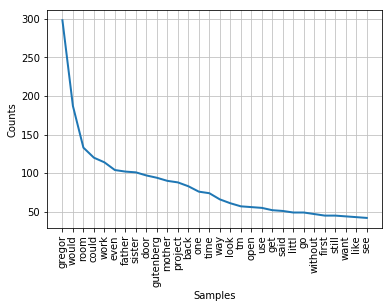

In [72]:
%matplotlib inline
meta_freqdist.plot(30,cumulative=False)

**TASK**: Create word frequency plot for your article

Question:  Should any more stop words be added to the list given your plot results?

In [73]:
meta_finder = BigramCollocationFinder.from_words(meta_stemmed)

In [76]:
meta_finder

## Creating a Data frame that compares the documents

**Puzzle**: how could you adapt the code below to allow you to compare documents and word counts?

In [77]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

docs = ['why hello there', 'omg hello pony', 'she went there? omg']
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

   hello  omg  pony  she  there  went  why
0      1    0     0    0      1     0    1
1      1    1     1    0      0     0    0
2      0    1     0    1      1     1    0
